## Perceptron Algorithm

The Perceptron is a basic building block of artificial neural networks, specifically a single-layer neural network used for binary classification.

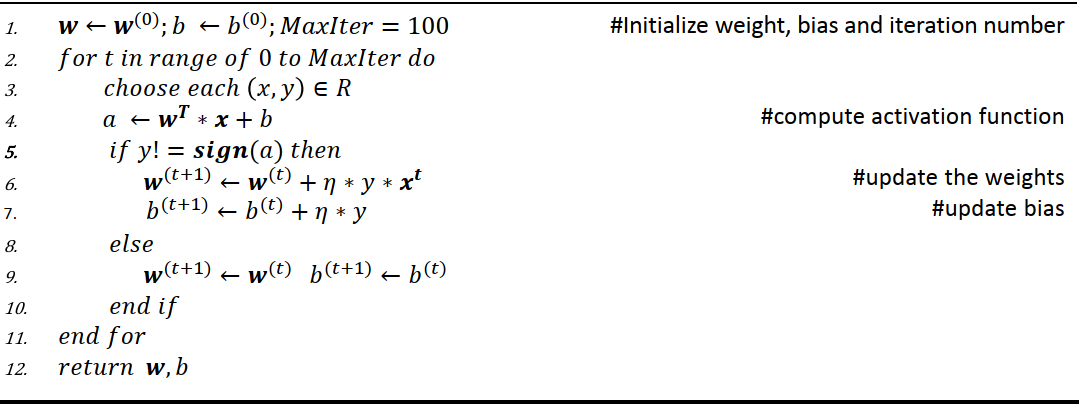

In [26]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

# Example usage:

# Set up training data
training_inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

labels = np.array([0, 0, 0, 1])

# Create a perceptron with 2 input nodes (size of each input vector)
perceptron = Perceptron(input_size=2)

# Train the perceptron
perceptron.train(training_inputs, labels)

# Test the perceptron
test_inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

for inputs in test_inputs:
    prediction = perceptron.predict(inputs)
    print(f"Inputs: {inputs}, Prediction: {prediction}")


Inputs: [0 0], Prediction: 0
Inputs: [0 1], Prediction: 0
Inputs: [1 0], Prediction: 0
Inputs: [1 1], Prediction: 1


## Building a Neural Network and Predicting Iris Data set

A neural network is a computational model inspired by the way biological neural networks in the human brain work. It is composed of interconnected nodes, commonly referred to as neurons or artificial neurons. Neural networks are used for various machine learning tasks, including pattern recognition, classification, regression, and more.

Here are some key concepts related to neural networks:

**Neuron** (Node): The basic building block of a neural network. Neurons receive inputs, perform a computation, and produce an output.

**Layer**: Neurons are organized into layers. A neural network typically consists of an input layer, one or more hidden layers, and an output layer.

**Connection** (Edge): Connections exist between neurons, and each connection has a weight associated with it. During training, the network learns the optimal weights to make accurate predictions.

**Activation Function**: Each neuron typically has an activation function that determines its output based on the weighted sum of inputs. Common activation functions include sigmoid, hyperbolic tangent (tanh), and rectified linear unit (ReLU).

**Feedforward**: The process of passing data through the network from the input layer to the output layer. This is the forward pass during which predictions are made.

**Backpropagation**: The process of updating the weights in the network to minimize the difference between predicted and actual outputs. It involves calculating the gradient of the loss function with respect to the weights and adjusting the weights accordingly.

**Training**: The iterative process of presenting input data to the network, computing predictions, calculating the loss, and updating the weights using backpropagation.

**Loss Function**: A function that measures the difference between predicted and actual outputs. The goal during training is to minimize this loss.

**Optimization Algorithm**: The method used to adjust the weights in the network to minimize the loss. Common algorithms include gradient descent and its variants.


**Important note:**

If the target variable is a categorical data of two classes, then the Output Layer should have 2 Nodes and the activation function should be ‘Sigmoid’.

If it is a multi-class classification, then the Output Layer should have Nodes exactly the same number of classes of the target variable. And the activation function should be ‘Softmax’.

Below figure represents Softmax function:

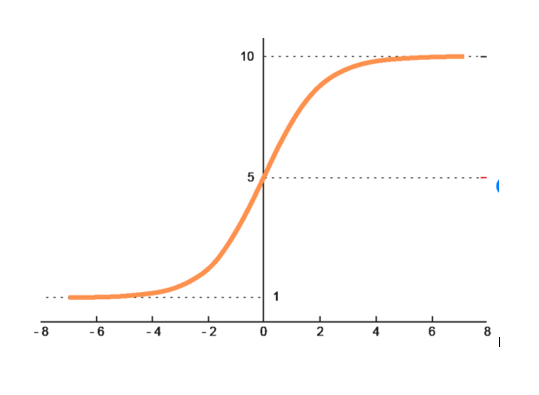

In [22]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [23]:
iris_data = load_iris() # load the iris dataset

x = iris_data.data
# Convert output data y to 1D array or single column
y = iris_data.target.reshape(-1, 1)

# Use One Hot encodeing to label the class
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

# Building the Neural Network model

model = Sequential()
# here value 10, 10, 3 under Dense is hiddenlayers
model.add(Dense(10, input_shape=(4,), activation='relu', name='HiddenLayer1'))
model.add(Dense(10, activation='relu', name='HiddenLayer2'))
model.add(Dense(3, activation='softmax', name='outputLayer'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_x, train_y, verbose=1, batch_size=5, epochs=50)

# Test on unseen data
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
24/24 [==============================] - 1s 2ms/step - loss: 1.3518 - accuracy: 0.3583
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 1.0449 - accuracy: 0.4500
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.9052 - accuracy: 0.7000
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.8158 - accuracy: 0.6917
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.7406 - accuracy: 0.6833
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.7667
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.7583
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.8667
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.8083
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.8083
Epoch 11/50
24/24 [

In [24]:
prediction = model.predict(test_x)
y_label=np.argmax(test_y,axis=1)
predict_label=np.argmax(prediction,axis=1)

1/1 [==============================] - 0s 57ms/step


In [25]:
df_predicted = pd.DataFrame({'Actual': y_label, 'Predicted': predict_label})
df_predicted.head(30)

,Actual,Predicted
0,1,1
1,2,2
2,2,1
3,0,0
4,1,1
5,2,2
6,1,1
7,1,1
8,1,1
9,1,1
